# Comparing versions

Comparing versions 2.10 and 2.11 accross the different normalizations techniques applied to create the protein embeddings (RGCN, ComplEx and concatenation of both)

In [1]:
seed=0

In [13]:
MAIN_DUMP=f'../../dump_seeds/dump_{seed}'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer

cache='../../results/figures/comparative_normalization_version/seed_'+str(seed)+'_versions/'
if not os.path.exists(cache):
    os.makedirs(cache)


### analysis

In [12]:
from IPython.display import display
all_results=pd.read_csv(f'../../results/tables/scores_all_seed{seed}.csv')
display(all_results)

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,random_forest,Complex_protein_embeddings,none,v2.10,0.778708,0.897436,0.921053,0.909091,0.577079,0.925837,0.979335,0.098828
1,random_forest,Complex_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.270335,0.675974,0.201608
2,random_forest,concatenated_protein_embeddings,none,v2.10,0.824163,0.921053,0.921053,0.921053,0.648325,0.947368,0.985782,0.085299
3,random_forest,concatenated_sample_embeddings,none,v2.10,0.577751,0.804348,0.973684,0.880952,0.270636,0.478469,0.798355,0.190975
4,random_forest,gene_expression,none,NaN,0.714115,0.860465,0.973684,0.913580,0.545073,0.921053,0.976706,0.105057
...,...,...,...,...,...,...,...,...,...,...,...,...
143,svm,concatenated_protein_embeddings,minmax,v2.11,0.824163,0.921053,0.921053,0.921053,0.648325,0.918660,0.976031,0.096490
144,svm,RGCN_protein_embeddings,minmax,v2.11,0.824163,0.921053,0.921053,0.921053,0.648325,0.918660,0.976031,0.096490
145,xgboost,Complex_protein_embeddings,minmax,v2.11,0.901914,0.971429,0.894737,0.931507,0.742426,0.942584,0.984163,0.084543
146,xgboost,concatenated_protein_embeddings,minmax,v2.11,0.915072,0.972222,0.921053,0.945946,0.784546,0.954545,0.986396,0.075406


In [4]:
datasets=['Complex_protein_embeddings','RGCN_protein_embeddings','concatenated_protein_embeddings']
temp_df=all_results[all_results['input'].isin(datasets)].sort_values(by=['input','model','version','normalization'])


In [5]:
df=temp_df
df['version'].unique()

array(['v2.10', 'v2.11'], dtype=object)

In [ ]:
metric='balanced_accuracy'

#### boxplot

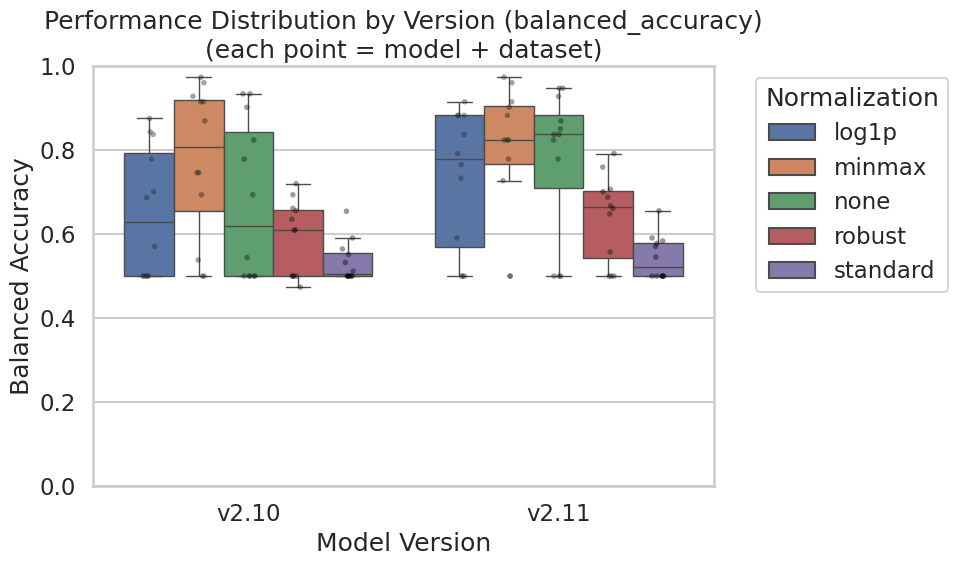

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", palette="deep")

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x="version",
    y=metric,
    hue="normalization",
    showfliers=False
)

sns.stripplot(
    data=df,
    x="version",
    y=metric,
    hue="normalization",
    dodge=True,
    color="black",
    alpha=0.4,
    size=4,
    legend=False
)

plt.ylabel(metric.replace("_", " ").title())
plt.xlabel("Model Version")
plt.title(
    f"Performance Distribution by Version ({metric})\n"
    "(each point = model + dataset)"
)

plt.ylim(0, 1)
plt.legend(title="Normalization", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# -- save in cache BEFORE showing
plt.savefig(os.path.join(cache, f'boxplot_comparative_normalization_version_{metric}.png'))
plt.show()

#### bar plots

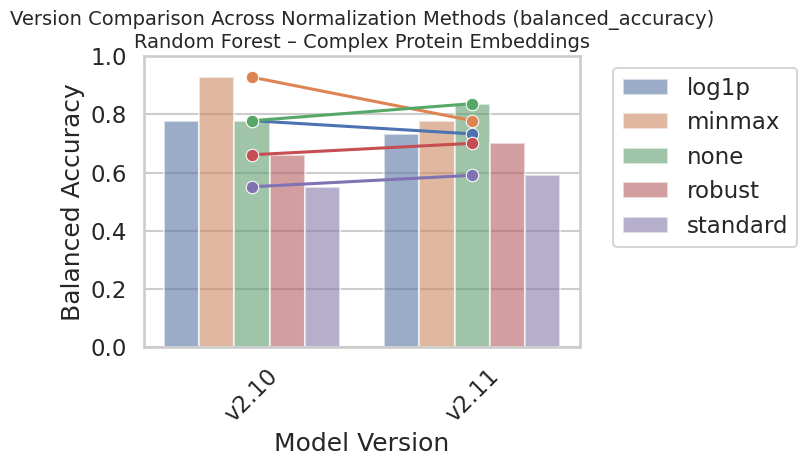

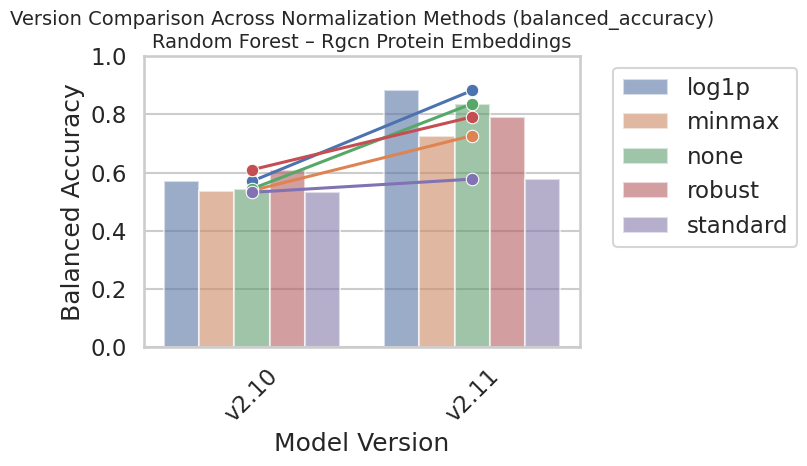

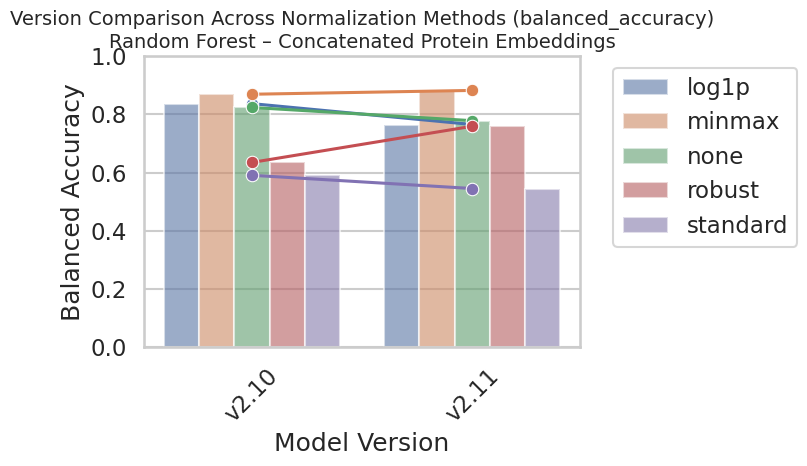

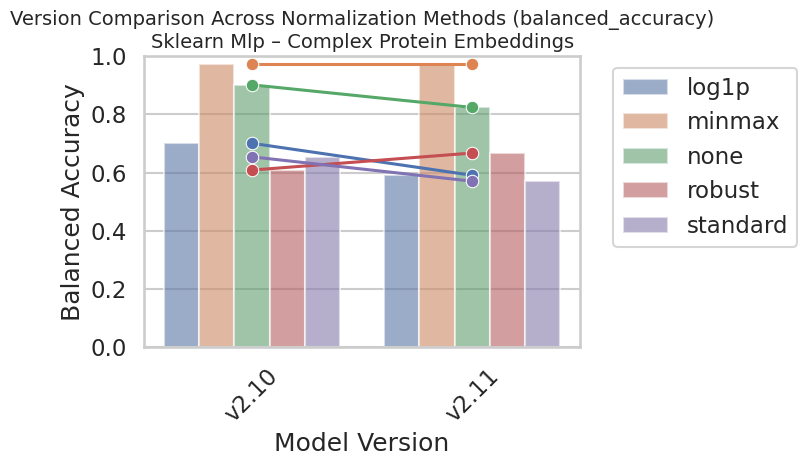

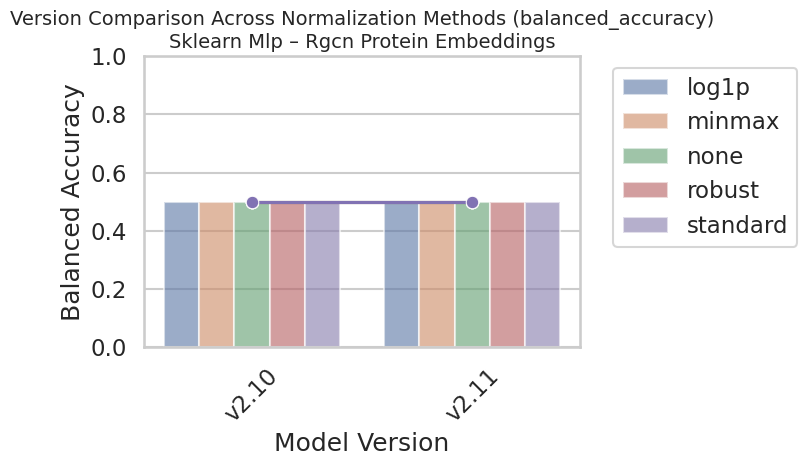

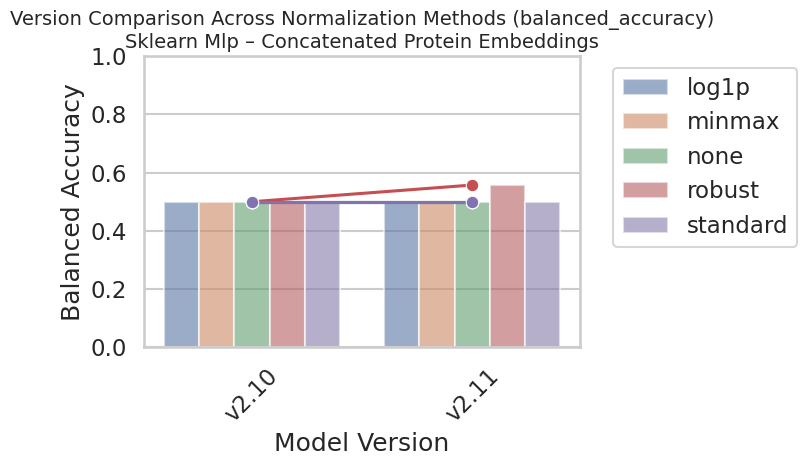

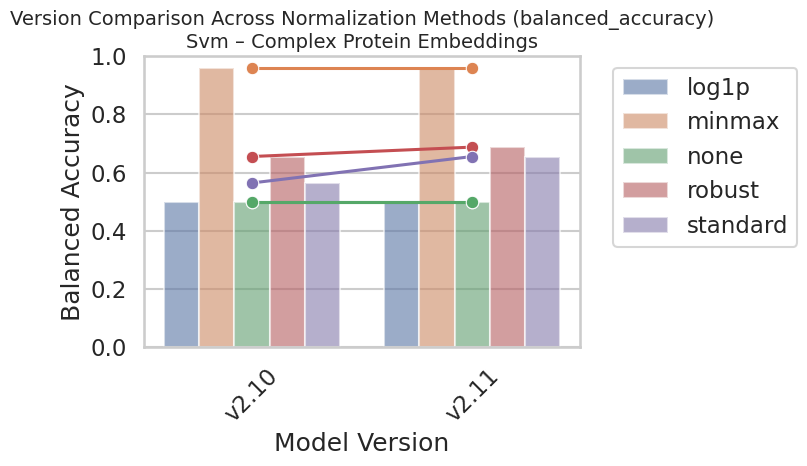

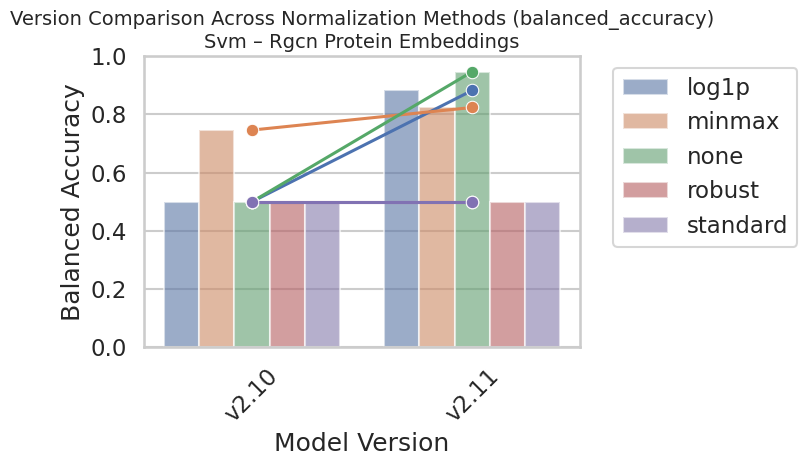

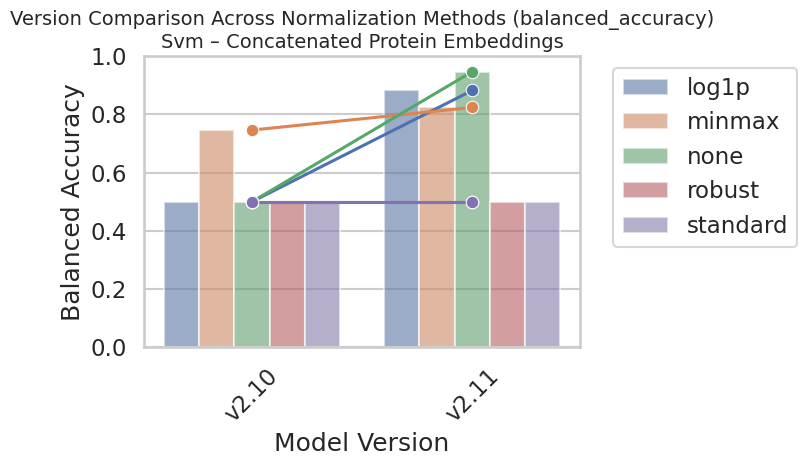

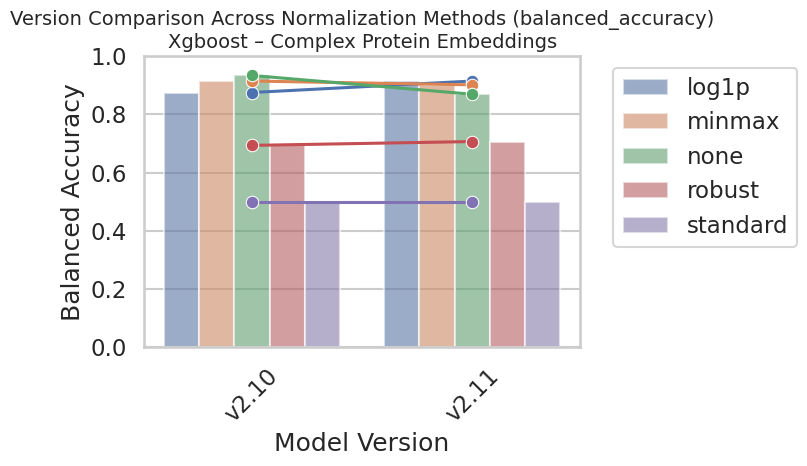

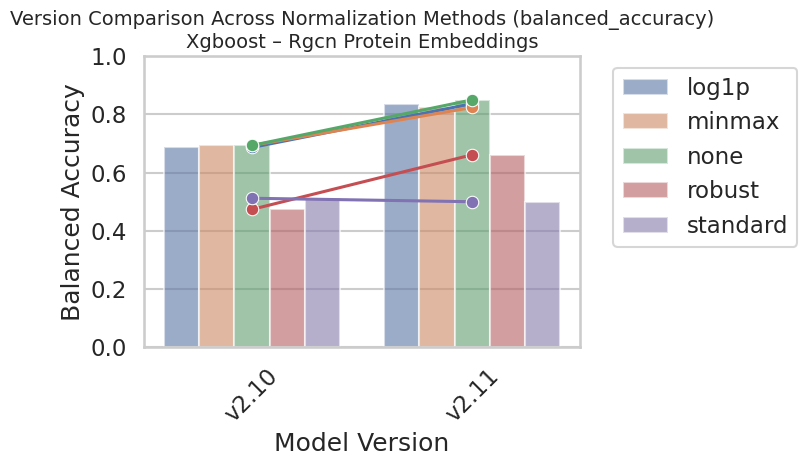

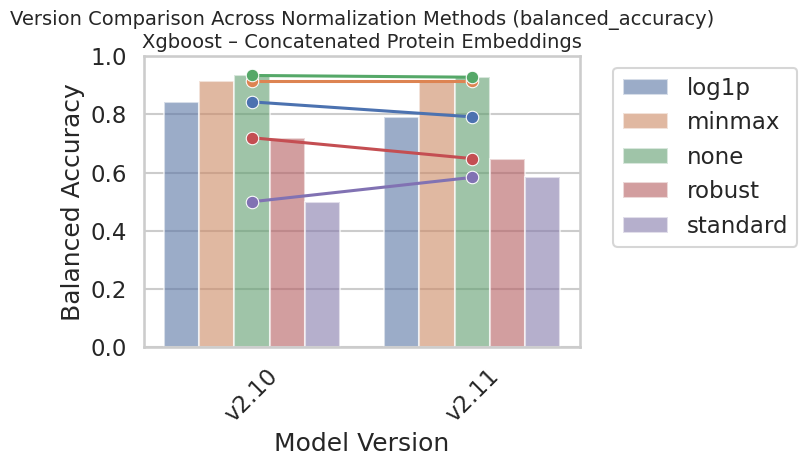

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", palette="deep")

for model in df['model'].unique():
    for dataset in df['input'].unique():
        subset = df[(df["model"] == model) & (df["input"] == dataset)]
        
        plt.figure(figsize=(8,5))
        
        sns.barplot(
            data=subset,
            x="version",
            y=metric,
            hue="normalization",
            alpha=0.6
        )
        sns.lineplot(
            data=subset,
            x="version",
            y=metric,
            hue="normalization",
            marker="o",
            linewidth=2.2,
            legend=False
        )
        
        plt.ylabel(metric.replace("_", " ").title())
        plt.xlabel("Model Version")
        plt.title(
            f"Version Comparison Across Normalization Methods ({metric})\n"
            f"{model.replace('_',' ').title()} – {dataset.replace('_',' ').title()}",
            fontsize=14
        )
        plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # -- save in cache BEFORE showing
        plt.savefig(os.path.join(cache, f'barplot_{model}_{dataset}_{metric}.png'))

        plt.show()
